In [1]:
# --------------------------------------------
# CELL 1: Imports and display settings
# --------------------------------------------

# Import core data libraries used throughout the notebook
import pandas as pd          # For data loading, cleaning, analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For charts/plots

# Make pandas print more columns if needed (helps during EDA)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

# Set a random seed for any sampling/reproducibility
RANDOM_STATE = 42

# Optional: inline plotting in Jupyter
%matplotlib inline


In [2]:
# --------------------------------------------
# CELL 2: File path and data loading
# --------------------------------------------

# Define the Windows file path to your CSV (raw dataset)
# NOTE: use a raw string r"..." or double backslashes in Windows paths
csv_path = r"C:\Users\roshn\OneDrive\Desktop\Build in Fellowship Project Updated\Cab_Fare_dataset.csv"

# Read the CSV into a pandas DataFrame
# low_memory=False avoids mixed-type guessing; on_bad_lines='skip' ignores badly formatted rows if any
df = pd.read_csv(csv_path, low_memory=False, on_bad_lines='skip')

# Show basic info: number of rows & columns
print("Shape (rows, cols):", df.shape)

# Peek at the first few rows to confirm loaded correctly
df.head()


Shape (rows, cols): (693071, 57)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# --------------------------------------------
# CELL 3: Explore schema, dtypes, basic statistics
# --------------------------------------------

# Print column names
print("Columns:\n", list(df.columns))

# Show data types and non-null counts
print("\nData types & non-null counts:")
df.info()

# Show basic numeric stats (count/mean/std/min/quantiles/max)
print("\nBasic numeric description:")
df.describe().T


Columns:
 ['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']

Data types & non-null counts:
<class 'pandas.core.fram

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Column cheat-sheet + why it might matter

id: unique row id (useful for deduping; not a model feature).

timestamp/datetime/timezone: ride time & tz; critical for time features (rush hours, weather alignment).

hour, day, month: extracted time parts; useful for demand/price patterns.

source, destination: pickup/dropoff zones; very predictive of price/distance.

cab_type, product_id, name: provider & product tier (e.g., UberX vs. UberBlack); strong price signal.

price: TARGET if you’re predicting fare; must be positive and realistic.

distance: trip distance (key driver of price); must be positive and realistic.

surge_multiplier: dynamic pricing factor; highly predictive of price.

latitude, longitude: sometimes raw location; may be noisy; can be engineered to zones.

Weather features (e.g., temperature, apparentTemperature, humidity, windSpeed, visibility, precipIntensity, precipProbability, dewPoint, pressure, cloudCover, uvIndex, ozone, etc.) and their time-stamped highs/lows: can influence demand/surge and travel times.

Astronomical/time features (sunriseTime, sunsetTime, moonPhase, uvIndexTime, etc.): secondary; may correlate with time-of-day light/dark conditions.

Duplicates like visibility and visibility.1: keep one; drop the duplicate.

Modeling importance (typical)
Very important: distance, surge_multiplier, cab_type/product_id/name, source, destination, hour/day/month.
Helpful: weather features (precip*, temperature, humidity, wind*, cloudCover, visibility).
Low importance / drop: raw id, duplicated columns, improperly formatted location columns if too sparse/noisy.

In [4]:
# --------------------------------------------
# CELL 5: Light cleaning (types, duplicates, missingness)
# --------------------------------------------

# Make a working copy to avoid accidental mutation
data = df.copy()

# (A) Deduplicate rows if 'id' exists, else full-row dedupe
if 'id' in data.columns:
    before = len(data)
    data = data.drop_duplicates(subset=['id'])
    print(f"Dedup by id: removed {before - len(data)} rows")
else:
    before = len(data)
    data = data.drop_duplicates()
    print(f"Full-row dedup: removed {before - len(data)} rows")

# (B) Parse timestamps if present
# Try 'timestamp' first, else 'datetime' if that exists
if 'timestamp' in data.columns:
    data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce', utc=True)
elif 'datetime' in data.columns:
    data['timestamp'] = pd.to_datetime(data['datetime'], errors='coerce', utc=True)
else:
    # If neither exists, create from hour/day/month if available (fallback)
    if set(['hour','day','month']).issubset(data.columns):
        # Create a fake date using day/month; year default 2018; adjust as needed
        base_year = 2018
        data['timestamp'] = pd.to_datetime(
            dict(year=base_year, month=data['month'], day=np.clip(data['day'], 1, 28), hour=data['hour']),
            errors='coerce'
        )
    else:
        data['timestamp'] = pd.NaT

# (C) Standardize basic numeric types if columns exist
for col in ['price', 'distance', 'surge_multiplier', 'humidity', 'temperature', 'apparentTemperature',
            'precipIntensity', 'precipProbability', 'windSpeed', 'windGust', 'visibility',
            'dewPoint', 'pressure', 'cloudCover', 'uvIndex', 'ozone']:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# (D) If there is a duplicate column like "visibility.1", prefer the non-suffixed one
if 'visibility.1' in data.columns:
    # fill missing visibility from visibility.1 then drop visibility.1
    if 'visibility' in data.columns:
        data['visibility'] = data['visibility'].fillna(data['visibility.1'])
    else:
        data = data.rename(columns={'visibility.1': 'visibility'})
    data = data.drop(columns=[c for c in data.columns if c == 'visibility.1'])

# (E) Recompute hour/day/month reliably from timestamp (keeps given columns consistent)
data['hour_from_ts'] = data['timestamp'].dt.hour
data['day_from_ts'] = data['timestamp'].dt.day
data['month_from_ts'] = data['timestamp'].dt.month

# If original hour/day/month exist, fill missing from recomputed versions
if 'hour' in data.columns:
    data['hour'] = data['hour'].fillna(data['hour_from_ts'])
else:
    data['hour'] = data['hour_from_ts']

if 'day' in data.columns:
    data['day'] = data['day'].fillna(data['day_from_ts'])
else:
    data['day'] = data['day_from_ts']

if 'month' in data.columns:
    data['month'] = data['month'].fillna(data['month_from_ts'])
else:
    data['month'] = data['month_from_ts']

# Drop helper columns (keep only original hour/day/month)
data = data.drop(columns=['hour_from_ts', 'day_from_ts', 'month_from_ts'])

# (F) Basic sanity filters for key fields
# Keep only reasonable/positive distances and prices if those columns exist
if 'distance' in data.columns:
    data = data[(data['distance'].notna()) & (data['distance'] > 0)]
if 'price' in data.columns:
    data = data[(data['price'].notna()) & (data['price'] > 0)]

# Surge multiplier must be >= 1 (typical), drop nonsense if present
if 'surge_multiplier' in data.columns:
    data = data[(data['surge_multiplier'].isna()) | (data['surge_multiplier'] >= 1)]

# (G) Remove extreme outliers with quantile caps (winsorize by filtering)
def cap_filter(df_, col, lower_q=0.001, upper_q=0.999):
    if col in df_.columns:
        lo = df_[col].quantile(lower_q)
        hi = df_[col].quantile(upper_q)
        return df_[(df_[col].isna()) | ((df_[col] >= lo) & (df_[col] <= hi))]
    return df_

for c in ['price','distance','temperature','apparentTemperature','humidity','windSpeed','visibility','pressure']:
    data = cap_filter(data, c)

print("After cleaning shape:", data.shape)

# Show remaining missingness (top 20)
miss = (data.isna().mean()*100).sort_values(ascending=False).head(20).round(2)
print("\nTop missingness %:")
print(miss)


Dedup by id: removed 0 rows
After cleaning shape: (635458, 56)

Top missingness %:
id                     0.0
timestamp              0.0
hour                   0.0
day                    0.0
month                  0.0
datetime               0.0
timezone               0.0
source                 0.0
destination            0.0
cab_type               0.0
product_id             0.0
name                   0.0
price                  0.0
distance               0.0
surge_multiplier       0.0
latitude               0.0
longitude              0.0
temperature            0.0
apparentTemperature    0.0
short_summary          0.0
dtype: float64


In [5]:
# --------------------------------------------
# CELL 6: Minimal imputation for selected columns (optional)
# --------------------------------------------

# Numeric columns: fill a few weather cols with median as a simple baseline
numeric_to_fill = [
    'temperature','apparentTemperature','humidity','windSpeed','visibility',
    'pressure','cloudCover','precipIntensity','precipProbability'
]
for col in numeric_to_fill:
    if col in data.columns:
        med = data[col].median()
        data[col] = data[col].fillna(med)

# Categorical columns: fill with "Unknown" where missing
categorical_cols = ['cab_type','name','source','destination','timezone','product_id']
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].astype('string').fillna('Unknown')

print("Post-imputation missingness on key fields:")
print((data[numeric_to_fill].isna().mean()*100).round(2) if len(numeric_to_fill) else "No numeric fields filled")


Post-imputation missingness on key fields:
temperature            0.0
apparentTemperature    0.0
humidity               0.0
windSpeed              0.0
visibility             0.0
pressure               0.0
cloudCover             0.0
precipIntensity        0.0
precipProbability      0.0
dtype: float64



Top correlations with price:
price                         1.000000
distance                      0.342878
surge_multiplier              0.207061
latitude                      0.001940
visibility                    0.001384
windGust                      0.001292
precipIntensityMax            0.001115
windSpeed                     0.001053
cloudCover                    0.001023
apparentTemperatureLow        0.001020
month                         0.000947
windGustTime                  0.000723
pressure                      0.000701
apparentTemperatureMinTime    0.000692
temperatureMinTime            0.000645
Name: price, dtype: float64


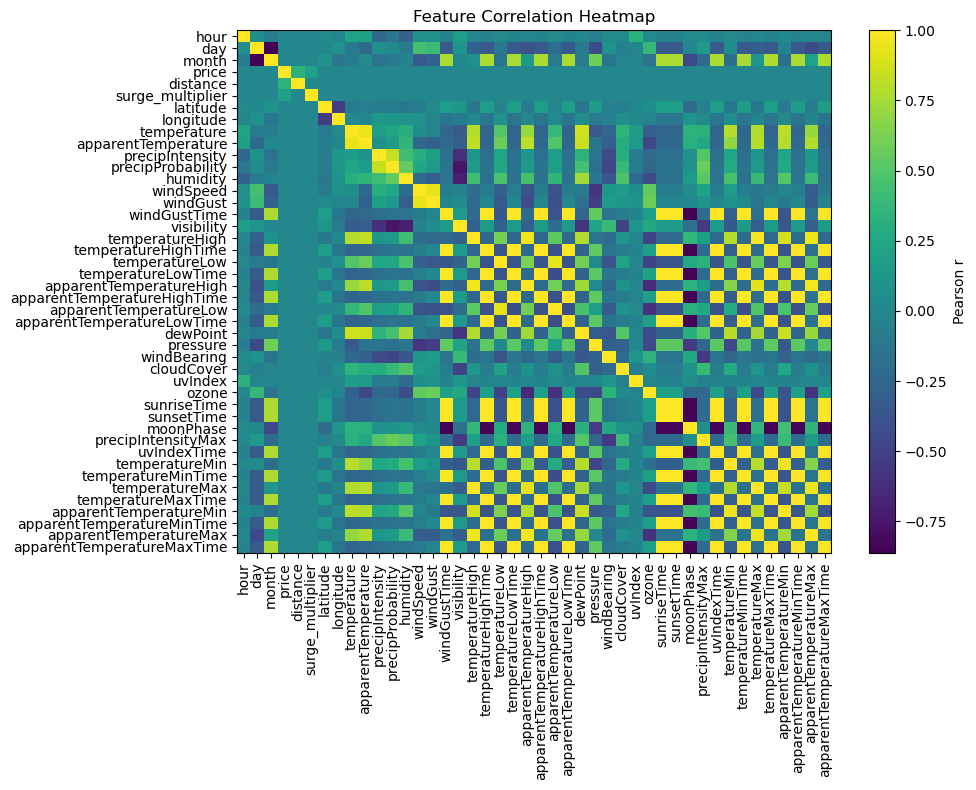

In [6]:
# --------------------------------------------
# CELL 7: Correlation analysis (numeric-only)
# --------------------------------------------

# Select only numeric columns for correlation
numeric_df = data.select_dtypes(include=[np.number]).copy()

# Drop id-like or time-like integers that don't carry continuous meaning (optional)
for drop_like in ['id']:
    if drop_like in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=[drop_like])

# Compute Pearson correlation matrix
corr = numeric_df.corr(numeric_only=True)

# Show the top correlations with price if price exists
if 'price' in corr.columns:
    print("\nTop correlations with price:")
    print(corr['price'].sort_values(ascending=False).head(15))

# Plot a quick heatmap using matplotlib (no seaborn required)
plt.figure(figsize=(10, 8))
plt.imshow(corr.values, aspect='auto')
plt.colorbar(label='Pearson r')
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
# --------------------------------------------
# CELL 8: Save cleaned outputs
# --------------------------------------------

# Create a light, modeling-friendly dataset (e.g., keep essential columns)
keep_cols = []

# Always keep these if present
for c in ['timestamp','price','distance','surge_multiplier','cab_type','name','source','destination','hour','day','month']:
    if c in data.columns:
        keep_cols.append(c)

# Keep a subset of weather features if they exist
for c in ['temperature','apparentTemperature','humidity','windSpeed','visibility','pressure','cloudCover','precipIntensity','precipProbability']:
    if c in data.columns:
        keep_cols.append(c)

# Deduplicate keep_cols list
keep_cols = list(dict.fromkeys(keep_cols))

# Build modeling frame; fall back to full data if keep_cols is tiny
model_df = data[keep_cols].copy() if len(keep_cols) >= 6 else data.copy()

# Write full cleaned and modeling-friendly samples
data.to_csv("clean_full.csv", index=False)
model_df.to_csv("clean_model.csv", index=False)

print("Wrote: clean_full.csv  |  clean_model.csv")
print("Final shapes:", data.shape, model_df.shape)
